In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Visualizar encoding, delimitador, ...
with open("Dados/MICRODADOS_ENEM_2021.csv") as file:
    print(file.readline())

NU_INSCRICAO;NU_ANO;TP_FAIXA_ETARIA;TP_SEXO;TP_ESTADO_CIVIL;TP_COR_RACA;TP_NACIONALIDADE;TP_ST_CONCLUSAO;TP_ANO_CONCLUIU;TP_ESCOLA;TP_ENSINO;IN_TREINEIRO;CO_MUNICIPIO_ESC;NO_MUNICIPIO_ESC;CO_UF_ESC;SG_UF_ESC;TP_DEPENDENCIA_ADM_ESC;TP_LOCALIZACAO_ESC;TP_SIT_FUNC_ESC;CO_MUNICIPIO_PROVA;NO_MUNICIPIO_PROVA;CO_UF_PROVA;SG_UF_PROVA;TP_PRESENCA_CN;TP_PRESENCA_CH;TP_PRESENCA_LC;TP_PRESENCA_MT;CO_PROVA_CN;CO_PROVA_CH;CO_PROVA_LC;CO_PROVA_MT;NU_NOTA_CN;NU_NOTA_CH;NU_NOTA_LC;NU_NOTA_MT;TX_RESPOSTAS_CN;TX_RESPOSTAS_CH;TX_RESPOSTAS_LC;TX_RESPOSTAS_MT;TP_LINGUA;TX_GABARITO_CN;TX_GABARITO_CH;TX_GABARITO_LC;TX_GABARITO_MT;TP_STATUS_REDACAO;NU_NOTA_COMP1;NU_NOTA_COMP2;NU_NOTA_COMP3;NU_NOTA_COMP4;NU_NOTA_COMP5;NU_NOTA_REDACAO;Q001;Q002;Q003;Q004;Q005;Q006;Q007;Q008;Q009;Q010;Q011;Q012;Q013;Q014;Q015;Q016;Q017;Q018;Q019;Q020;Q021;Q022;Q023;Q024;Q025



In [3]:
df = pd.read_csv("Dados/MICRODADOS_ENEM_2021.csv", 
                 encoding='cp1252',
                delimiter=";",
                nrows=1000000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 76 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NU_INSCRICAO            1000000 non-null  int64  
 1   NU_ANO                  1000000 non-null  int64  
 2   TP_FAIXA_ETARIA         1000000 non-null  int64  
 3   TP_SEXO                 1000000 non-null  object 
 4   TP_ESTADO_CIVIL         1000000 non-null  int64  
 5   TP_COR_RACA             1000000 non-null  int64  
 6   TP_NACIONALIDADE        1000000 non-null  int64  
 7   TP_ST_CONCLUSAO         1000000 non-null  int64  
 8   TP_ANO_CONCLUIU         1000000 non-null  int64  
 9   TP_ESCOLA               1000000 non-null  int64  
 10  TP_ENSINO               426460 non-null   float64
 11  IN_TREINEIRO            1000000 non-null  int64  
 12  CO_MUNICIPIO_ESC        293025 non-null   float64
 13  NO_MUNICIPIO_ESC        293025 non-null   object 
 14  CO_

In [5]:
df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,745279.000000,781543.000000,781543.000000,745279.000000,781543.000000
mean,487.988832,518.547912,500.673120,530.683948,630.155705
std,80.732721,94.831908,78.799472,109.768162,190.976571
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,427.500000,444.800000,445.800000,441.800000,540.000000
50%,476.300000,518.900000,502.900000,508.400000,620.000000
75%,539.900000,586.500000,556.000000,605.900000,760.000000
max,867.100000,846.900000,813.200000,953.100000,1000.000000


In [6]:
p_CN = df["TP_PRESENCA_CN"].sum() / len(df["TP_PRESENCA_CN"])
p_CN

0.746193

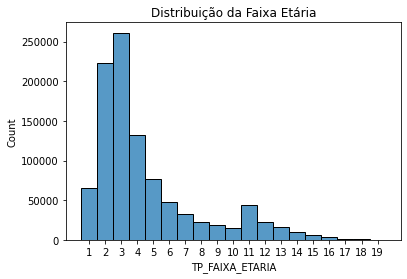

In [7]:
hist = sns.histplot(df["TP_FAIXA_ETARIA"], binwidth=1);

# Posição dos xticks vai ser o limite direito da barra 
# mais metade de seu comprimento
xticks = [rec.get_x() + 0.5*hist.patches[0].get_width() for rec in list(hist.patches)]

plt.xticks(xticks, labels=range(1, 20))
plt.title("Distribuição da Faixa Etária")
plt.show()

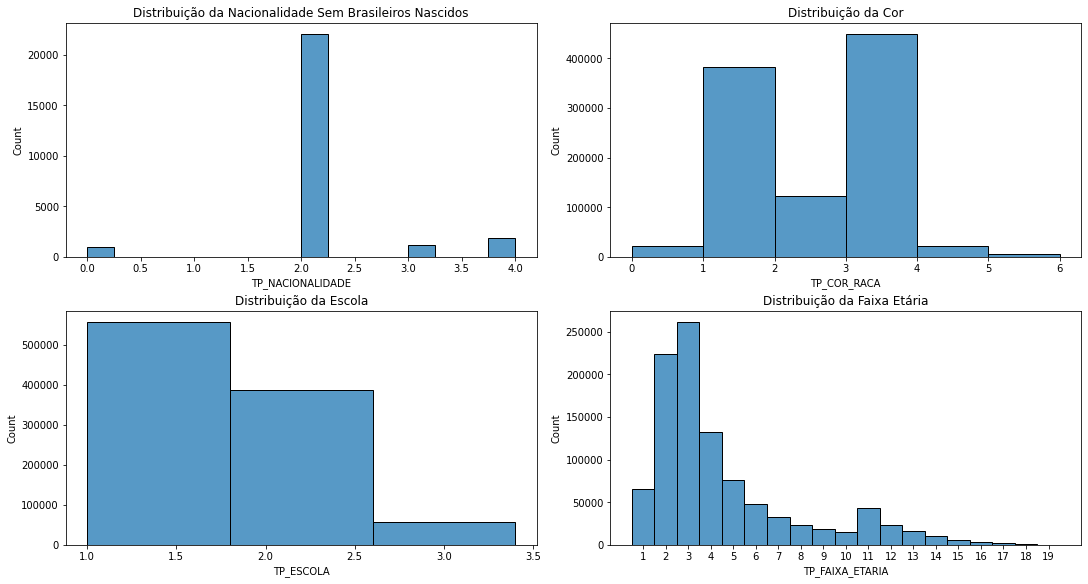

In [8]:
fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(15,8))


# ----------------------- Distribuição da Nacionalidade -----------------------
sns.histplot(df.loc[df["TP_NACIONALIDADE"]!=1, "TP_NACIONALIDADE"], ax=axs[0, 0]);
axs[0, 0].title.set_text("Distribuição da Nacionalidade Sem Brasileiros Nascidos")
# ---------------------------------------------------------------------------


# ----------------------- Distribuição da Cor -----------------------
sns.histplot(df["TP_COR_RACA"], ax=axs[0, 1], binwidth=1, bins=7);
axs[0, 1].title.set_text("Distribuição da Cor")
# ---------------------------------------------------------------------------


# ----------------------- Distribuição da Escola -----------------------
sns.histplot(df["TP_ESCOLA"], ax=axs[1, 0], binwidth=0.8);
axs[1, 0].title.set_text("Distribuição da Escola")
# ---------------------------------------------------------------------------


# ----------------------- Distribuição da Faixa Etária -----------------------
hist = sns.histplot(df["TP_FAIXA_ETARIA"], ax=axs[1, 1], binwidth=1);

# Posição dos xticks vai ser o limite direito da barra 
# mais metade de seu comprimento
xticks = [rec.get_x() + 0.5*hist.patches[0].get_width() for rec in list(hist.patches)]

axs[1, 1].set_xticks(xticks, labels=range(1, 20))
axs[1, 1].title.set_text("Distribuição da Faixa Etária")
# ---------------------------------------------------------------------------

In [10]:
UFs = df["SG_UF_PROVA"].unique()

variables = {"TP_ENSINO": 2,  # Educação especial
"TP_ESCOLA": 3,  #Escola privada
"TP_COR_RACA": 1,   # Brancos 
"TP_SEXO": "F", 
"TP_DEPENDENCIA_ADM_ESC": 1, # Federal 
"TP_PRESENCA_CN": 1, # Presente Prova de Ciencias da Natureza
"TP_PRESENCA_CH": 1, # Presente Prova de Ciencias Humanas
"TP_PRESENCA_LC": 1, # Presente Prova de Linguagem
"TP_PRESENCA_MT": 1} # Presente Prova de Matemática

translation = {"TP_ENSINO": "Educação especial",
"TP_ESCOLA": "Escola privada",
"TP_COR_RACA": "Brancos",
"TP_SEXO": "Mulheres", 
"TP_DEPENDENCIA_ADM_ESC": "Federal" ,
"TP_PRESENCA_CN": "Presença Ciencias da Natureza",
"TP_PRESENCA_CH": "Presença Ciencias Humanas",
"TP_PRESENCA_LC": "Presença Linguagem",
"TP_PRESENCA_MT": "Presença Matemática",
} 

In [ ]:
dfProportion = pd.DataFrame()

for factor in variables.keys():
    for UF in UFs:
        proportion = df.loc[df["SG_UF_PROVA"]==UF, factor].value_counts(normalize=True)[variables[factor]]
        dfProportion.loc[UF, translation[factor]] = proportion

#dfProportion

In [12]:
import geobr
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [13]:
br = geobr.read_state()
df_t = br.merge(dfProportion, how="left", left_on="abbrev_state", right_index=True)
#df_t

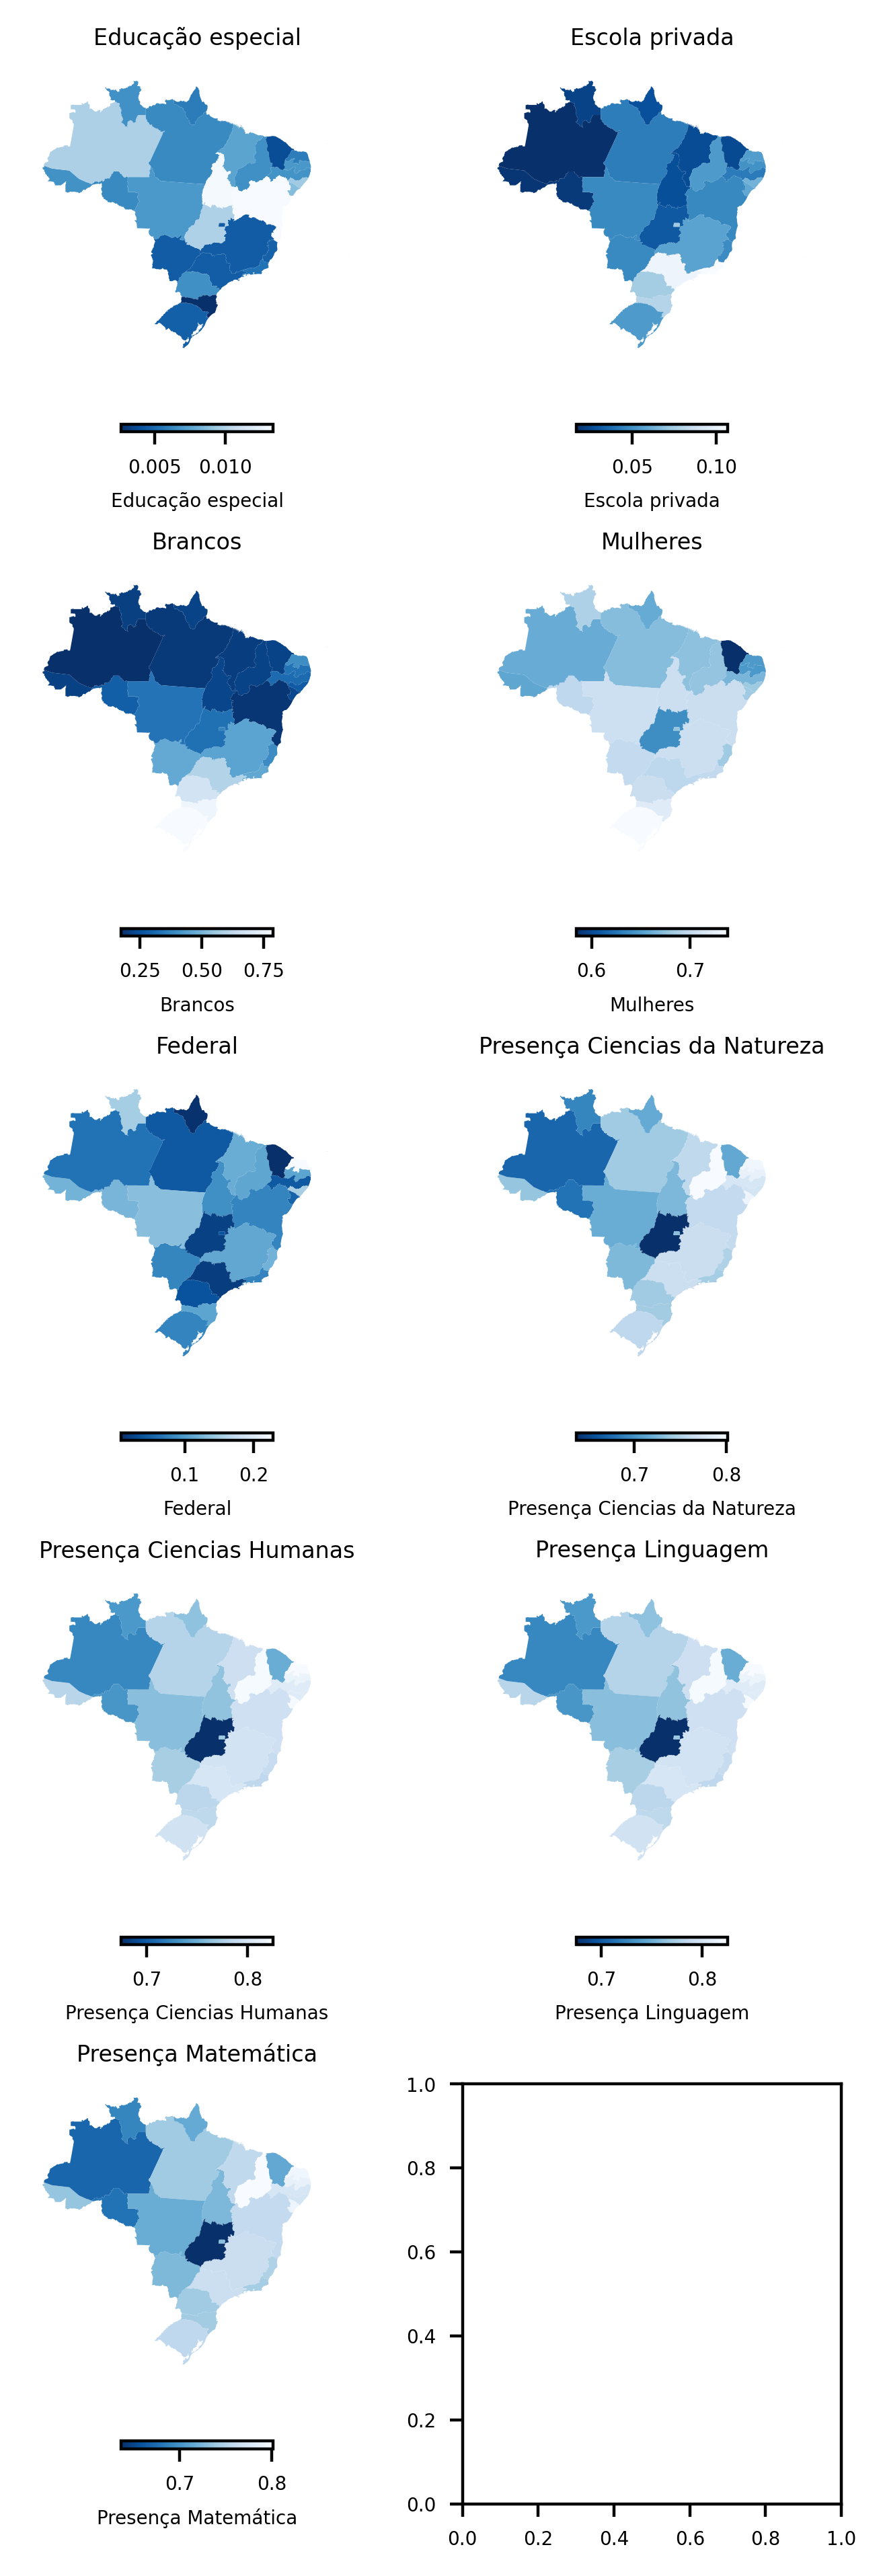

In [14]:
plt.rcParams.update({"font.size": 5});

quant_figuras = len(translation.values())
fig, axs = plt.subplots((quant_figuras+1)//2, 2, figsize=(4, 12), dpi=400);

for idx in range(quant_figuras):
    row = idx//2
    col = idx%2

    factor = list(translation.values())[idx]

    df_t.plot(
        column=factor,
        cmap="Blues_r",
        legend=True,
        legend_kwds={
            "label": factor,
            "orientation": "horizontal",
            "shrink": 0.4,
        },
        ax=axs[row, col],
    );

    axs[row, col].set_title(factor)
    axs[row, col].axis("off");
